In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import the packages**

In [23]:
visa_df=pd.read_csv(r"C:\Users\Vyshnavi\OneDrive\Documents\Data Science\Naresh IT\Data Files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Bi variate analysis**

- Analyse the two variables

- Two categorical columns

- Two numerical columns

- One categorical and One Numerical

**Categorical vs Categorical**

In [4]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
cat=visa_df.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Continent_case_status**

In [7]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [8]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**How many asia people got the visa Certified**

**How many asia people got the visa Denied**

In [9]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [10]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
len(visa_df[con])

11012

In [11]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Certified')
con=con1&con2
len(visa_df[con])
print(f"the number of employees visa certified are: {len(visa_df[con])}")

the number of employees visa certified are: 11012


In [35]:
con1=(visa_df['continent']=='Asia')
con2=(visa_df['case_status']=='Denied')
con=con1&con2
len(visa_df[con])
print(f"the number of employees visa denied are: {len(visa_df[con])}")

the number of employees visa denied are: 5849


In [24]:
keys=visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in keys:
    con1=(visa_df['continent']==i)
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    certi_con=con1&con2
    denied_con=con1&con3
    certified_list.append(len(visa_df[certi_con]))
    denied_list.append(len(visa_df[denied_con]))
    
pd.DataFrame(zip(certified_list,denied_list),
             columns=['Certified','Denied'],
             index=keys)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- cross tab will take two arguments

  - first argument : index
  
  - second argument : column

In [27]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1=pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [28]:
col1=visa_df['continent']
col2=visa_df['case_status']
result2=pd.crosstab(col2,col1)
result2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='continent'>

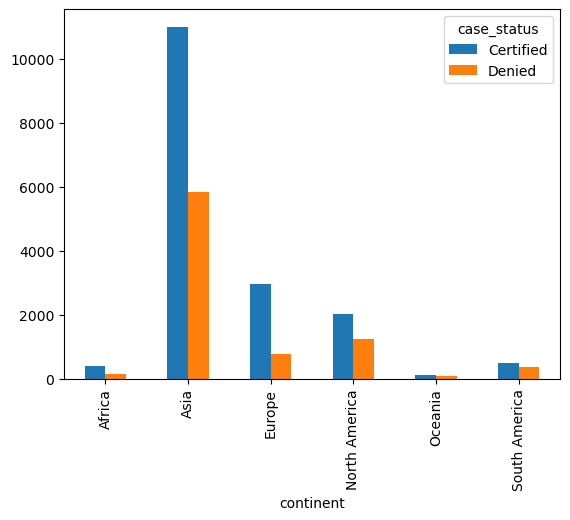

In [29]:
result1.plot(kind='bar')

<Axes: xlabel='case_status'>

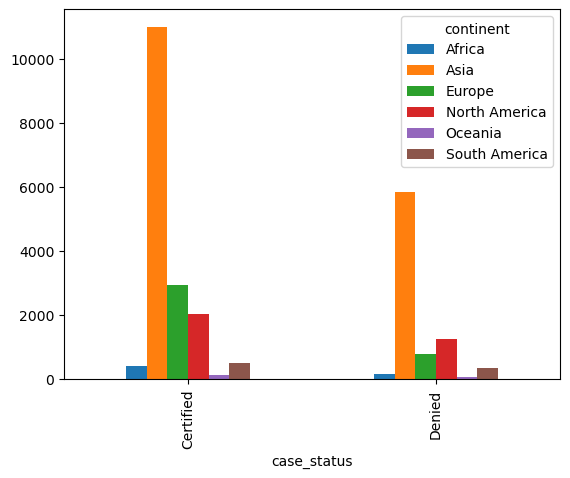

In [30]:
result2.plot(kind='bar')

In [32]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
col=[col1,col2]
result3=pd.crosstab(col,col3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

In [33]:
result3.plot

**Numerical-Numerical**

- In order to plot numerical vs numerical we need to use scatter plots

- Scatter plot will give the relation between two numerical columns

- It is under matplotlib

$plt.scatter$

In [ ]:
#y=x graph

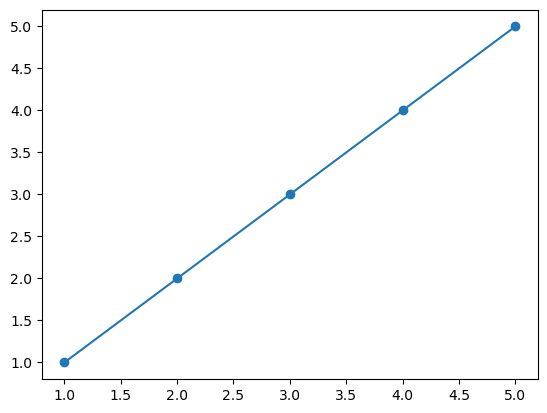

In [34]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
 # it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

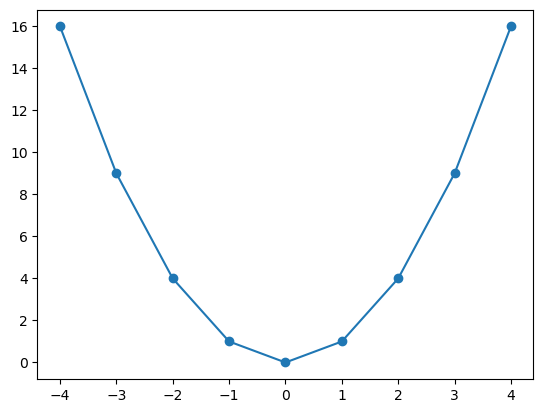

In [35]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [62]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Scatter plot-1**

- no_of employees and yr_of_estab

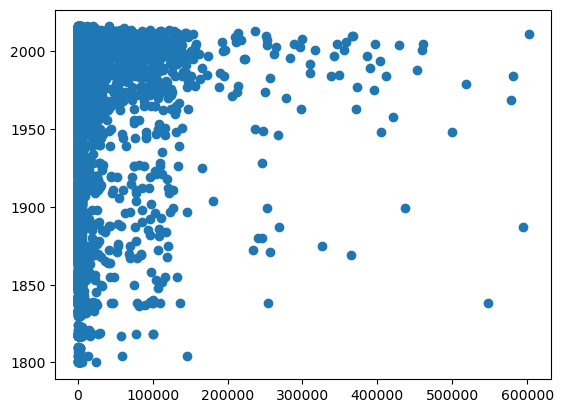

In [36]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

**Obsevation**: No relation

 - peason correlation coeff=0

**Scatter plot-2**

- no_of_employees and prevailing_wage

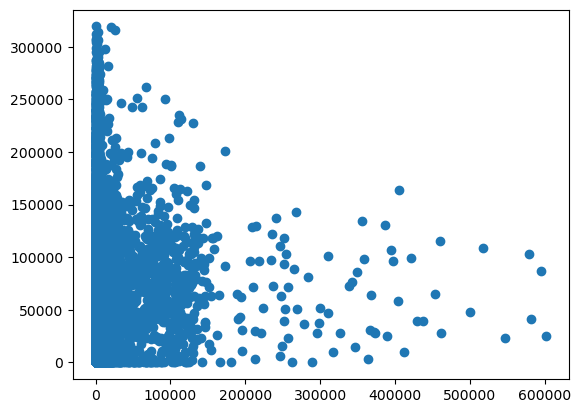

In [37]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

**Obsevation**: No relation
    
     pearson correlation coeff=0

**Scatter plot-3**

- yr_of_estab and prevailing_wage

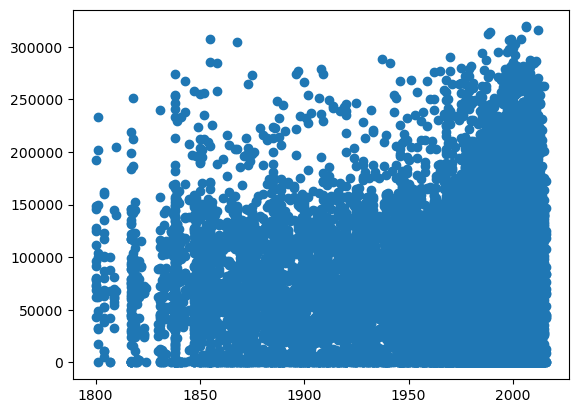

In [39]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

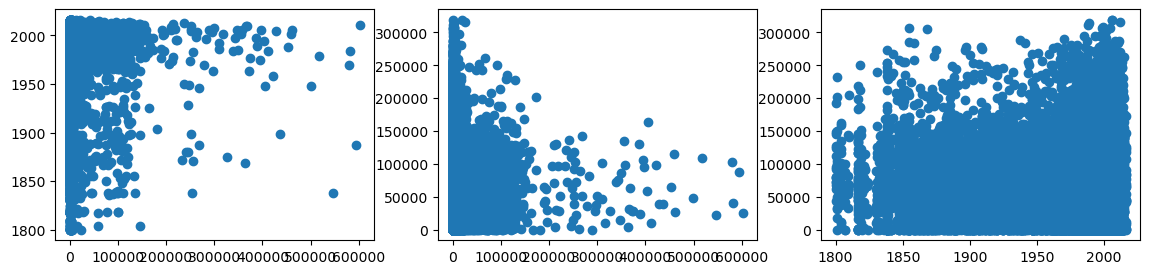

In [41]:
plt.figure(figsize=(14,3))

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.subplot(1,3,1).scatter(col1,col2)

col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,2).scatter(col1,col2)

col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.subplot(1,3,3).scatter(col1,col2)

**Correlation Coefficient**

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEp2A_l2XGVWDGnfBpe_4bZ2OmKFTH6zJo0g&amp;s" jsaction="VQAsE" class="sFlh5c pT0Scc" alt="Correlation Coefficient: Simple Definition, Formula, Easy Calculation Steps" jsname="JuXqh" style="max-width: 827px; height: 184px; margin: 0px; width: 352px;" data-ilt="1717770514086">

- Perason correlation coeffiecient will give the amount of relation between variables

- It is denoted with r

- r varies from -1 to 1

- For positive relation r varies 0 to 1

- For negative relation r varies from -1 to 0

- For no relation r approximate 0

- In python code we have **corr** function under pandas

    - This will give covariance matrix
    
    - we already discussed covariance matrix is rows and columns type
    
    - in this data we have 3 numerical columns
    
    - so we will get 3*3 9 values
    
    - All trace of the matrix represent variance
    
    - Upper triangle and lower triangle represents co variance

In [71]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Observations**

- The correlation value between no_of_employees and yr_of_estb approximately zero

   - which indicates no relation
    
- The correlation value between no_of_employees and prevailing_wage approximately zero

   - which indicates no relation
    
- The correlation value between yr_of_estb and prevalling_wage approximately zero

   - which indicates no relation 

**What happen if correlation is high**

- for that we will read wine quality dataset

- will perform the corr

In [9]:
import pandas as pd

In [30]:
wine_data=pd.read_csv("C:\\Users\\Vyshnavi\\OneDrive\\Documents\\Data Science\\Naresh IT\\Data Files\\winequality_red - winequality_red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
wine_data=wine_data.drop_duplicates()
wine_data.iloc[1:,:]    # indexes are not in the order
# indexes are not in the order

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [12]:
len(wine_data.columns)

12

In [ ]:
# corr

In [13]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


**heat map**

- heat map will provide the matrix representation of correlation value

- heat map represents values in color format

- different different value in different color

- beside matrix it will display color bar

- color bar means like as scale of values with color

- it is under seaborn package

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

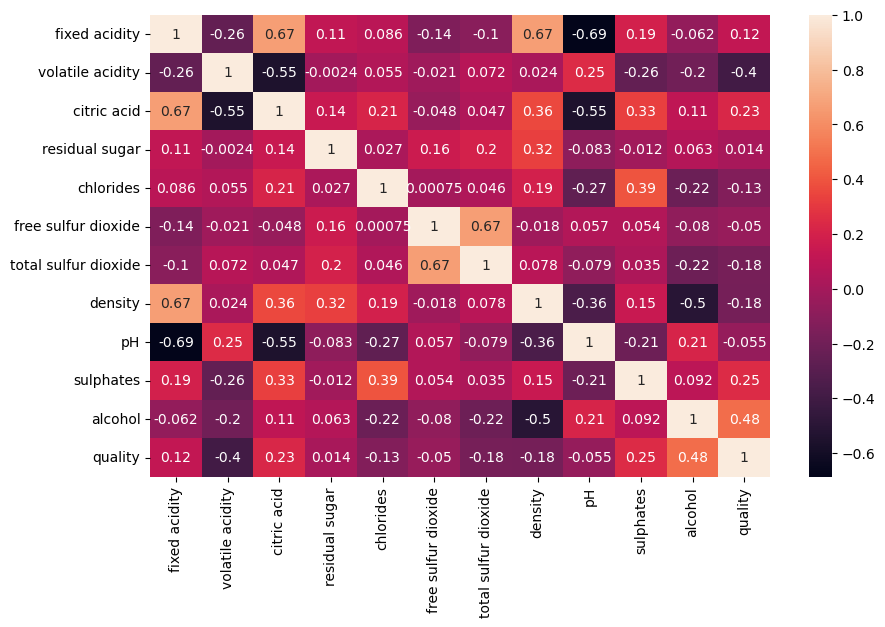

In [20]:
wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(wine_corr,
           annot=True)

In [28]:
import seaborn as sns
sns.__version__

'0.12.2'

<Axes: >

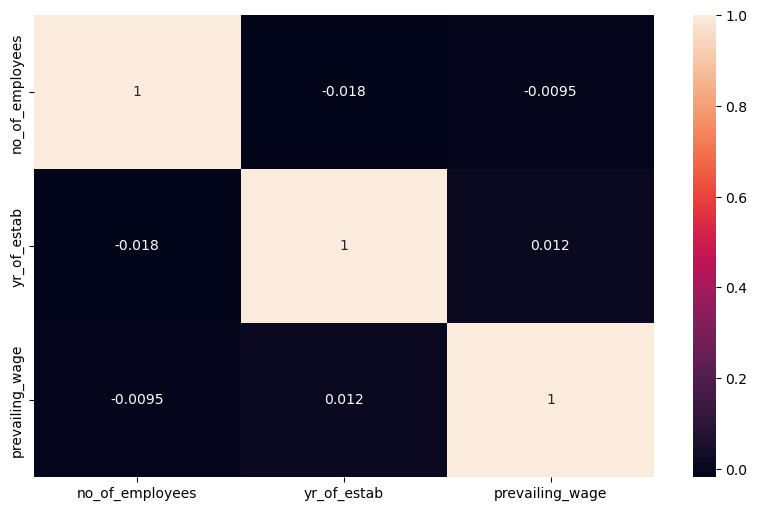

In [27]:
visa_corr=visa_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(visa_corr,
           annot=True)

In [ ]:
# Draw the scatter plot for wine data columns
# which is having highest positive correlation
# which is having lowest negative correlation

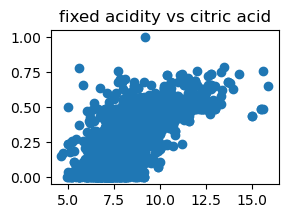

In [33]:
plt.figure(figsize=(10,2))
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('fixed acidity vs citric acid')
plt.show()